In [3]:
import pandas as pd
home_data=pd.read_csv('/Users/YenDo/Desktop/Introduction_kMeans_Clustering_w_scikitlearn/housing.csv',
                      usecols=['longitude','latitude','median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


**longitude**: Một giá trị biểu thị khoảng cách về phía tây của một ngôi nhà. Giá trị cao hơn đại diện cho những ngôi nhà xa hơn về phía Tây.

**latitude**: Một giá trị biểu thị khoảng cách về phía bắc của một ngôi nhà. Giá trị cao hơn đại diện cho những ngôi nhà xa hơn về phía bắc.

**median_house_value**: Giá nhà trung bình trong một khối được đo bằng USD.

<Axes: xlabel='longitude', ylabel='latitude'>

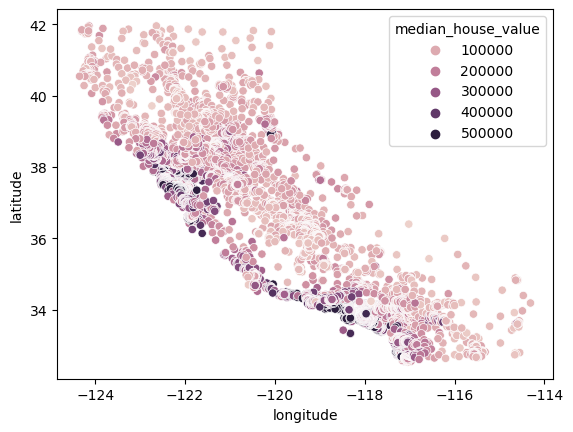

In [4]:
import seaborn as sns
sns.scatterplot(data=home_data,
                x='longitude',
                y='latitude',
                hue='median_house_value')

In [33]:
#Chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']],
home_data[['median_house_value']], test_size=1, random_state=0)
#test_size=0.33 xác định tỷ lệ phần trăm dữ liệu được chọn làm tập test, trong trường hợp này là 33% (0.3) (đã fix 100%)
#random_state=0 là giá trị seed để phân chia dữ liệu ngẫu nhiên và giữ cho kết quả phân chia được lặp lại mỗi lần chạy chương trình.

Đoạn mã  sử dụng hàm train_test_split() của thư viện Scikit-Learn để chia tập dữ liệu home_data thành 2 tập con: tập huấn luyện (train) và tập kiểm tra (test), với tỷ lệ phần trăm dữ liệu được chọn làm tập kiểm tra là 33% (test_size=0.33).

Cụ thể, đoạn mã này sẽ chia tập dữ liệu home_data thành 4 biến:

X_train: tập dữ liệu đầu vào của tập huấn luyện, chứa 2 cột là vĩ độ (latitude) và kinh độ (longitude) của các căn nhà.

X_test: tập dữ liệu đầu vào của tập kiểm tra, cũng chứa 2 cột là vĩ độ và kinh độ của các căn nhà.

y_train: tập dữ liệu đầu ra của tập huấn luyện, chứa giá trị trung bình của các căn nhà.

y_test: tập dữ liệu đầu ra của tập kiểm tra, cũng chứa giá trị trung bình của các căn nhà.

Việc chia tập dữ liệu này là để đảm bảo rằng mô hình dự đoán giá trị nhà được huấn luyện và đánh giá trên các tập dữ liệu độc lập nhau, giúp đánh giá chính xác độ chính xác và độ tin cậy của mô hình.

Ngoài ra, random_state=0 được sử dụng để giữ cho kết quả phân chia tập dữ liệu là cố định giữa các lần chạy chương trình, giúp cho việc tái sử dụng mã nguồn và phát triển mô hình dễ dàng hơn.

Chuẩn hóa dữ liệu là một bước quan trọng trong quá trình xử lý dữ liệu khi xây dựng mô hình học máy, giúp đưa các giá trị vào cùng một khoảng giá trị và độ lớn, tránh hiện tượng một số thuộc tính có giá trị lớn hơn so với các thuộc tính khác gây ảnh hưởng không tốt đến quá trình huấn luyện và đánh giá mô hình.

Ví dụ: Nếu bao gồm giá trong cụm, cộng thêm kinh độ và vĩ độ, thì giá sẽ có tác động lớn đối với việc chuẩn hóa data vì scale của nó lớn và rộng hơn đáng kể so với các biến vị trí.

Phương thức normalize() được sử dụng trong đoạn mã này để chuẩn hóa dữ liệu về đơn vị độ dài, tức là các giá trị trong hai cột vĩ độ và kinh độ sẽ được chuyển đổi về các giá trị nằm trong khoảng [0, 1], giúp cho việc huấn luyện mô hình dự đoán giá trị nhà được chính xác hơn.

In [34]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [35]:
print(type(X_train_norm[:10])) #print 10 dòng đầu tiên
print(X_train_norm.shape[0])

<class 'numpy.ndarray'>

20639


In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

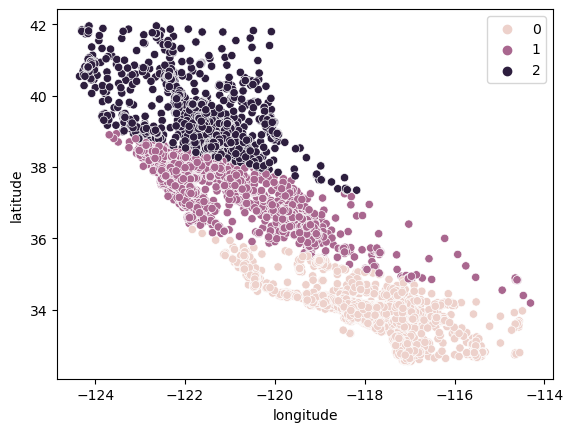

In [37]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

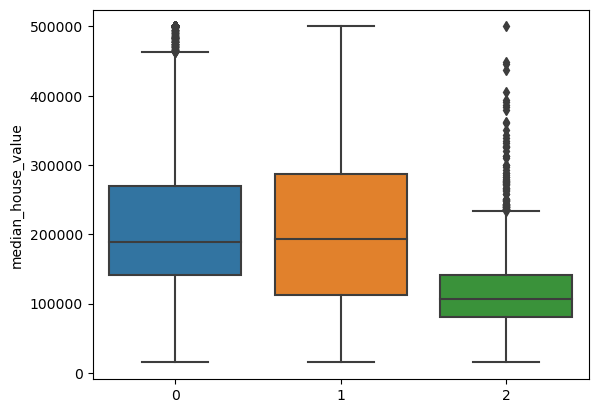

In [38]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [39]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499265662365191

Trong đoạn code trên, chúng ta sử dụng hàm silhouette_score từ scikit-learn để tính toán điểm silhouette cho mô hình phân cụm đã được huấn luyện bằng thuật toán KMeans trên tập dữ liệu huấn luyện đã được chuẩn hóa X_train_norm. Điểm silhouette là một phương pháp đánh giá mức độ tách biệt của các cụm, được tính bằng cách so sánh khoảng cách giữa các điểm trong cùng một cụm với khoảng cách giữa các điểm trong các cụm khác nhau.

Các tham số truyền vào trong hàm silhouette_score gồm:

X_train_norm: tập dữ liệu huấn luyện đã được chuẩn hóa

kmeans.labels_: là nhãn được dự đoán cho các điểm dữ liệu trong tập huấn luyện dựa trên mô hình KMeans

metric='euclidean': đây là khoảng cách được sử dụng để tính toán điểm silhouette. Trong trường hợp này, khoảng cách Euclidean được sử dụng.

Kết quả trả về là giá trị điểm silhouette cho mô hình phân cụm đã được huấn luyện. Giá trị này nằm trong khoảng [-1, 1], với giá trị càng cao thì mô hình càng tốt. Trong trường hợp này, giá trị điểm silhouette là 0.7499265662365191, cho thấy mô hình phân cụm đã đạt được mức độ tách biệt tương đối tốt giữa các cụm.

In [40]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: >

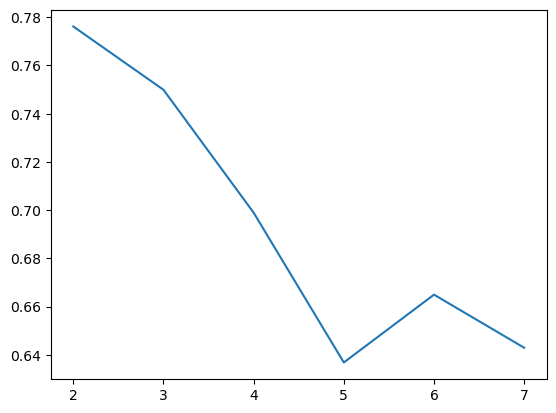

In [41]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

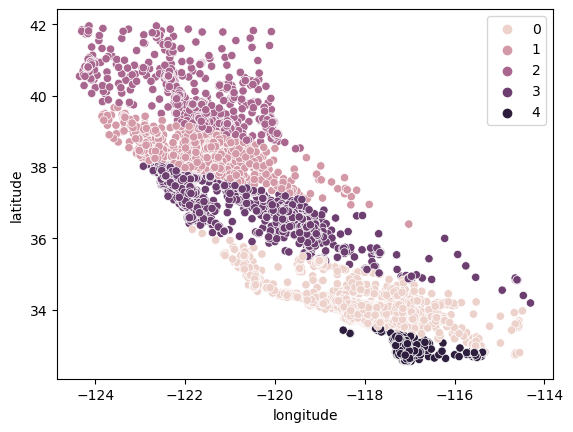

In [42]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

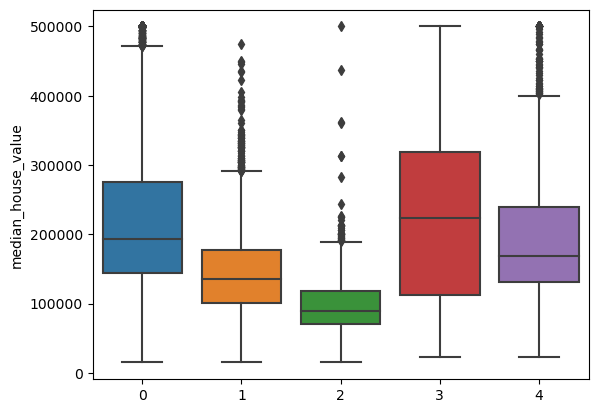

In [43]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

In [45]:
from scipy.stats import kurtosis

# Calculate kurtosis for each variable in the dataset
kurtosis_values = {}
for col in home_data.columns:
    kurtosis_values[col] = kurtosis(home_data[col])

# Print the kurtosis values
for col, kurtosis_val in kurtosis_values.items():
    print(f"{col}: {kurtosis_val}")

longitude: -1.3301208448425363

latitude: -1.117779708313892

median_house_value: 0.3275001388119616
